<a href="https://colab.research.google.com/github/lourencocavalcante/Introduction-to-Data-Science/blob/main/INPE_CAP394_2022_Atv01_parte2_Lourenco.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[<img src="https://github.com/lourencocavalcante/LogosINPE/blob/main/logoinpe.png?raw=true" width = 500 align="left">](https://www.gov.br/inpe/pt-br)

[<img src="https://github.com/lourencocavalcante/LogosINPE/blob/main/LogoCAP.png?raw=true" width = 300 align="right">](http://www.inpe.br/posgraduacao/cap/)

# **Atividades - Orientação de Mestrado**

**Professor:**

* Dr. Alan Calheiros

**Discente:**
* Lourenço José Cavalcante Neto

# PROPOSTA DE ATIVIDADE:

*   **A1.** Abrir os dados e criar os dataframes

*   **A2.** Colocar todos os dados em mesmo dataframe usando o pandas. Note que só quando houver dados no mesmo instante ou mais próximo. Usando o RD80 como referência. Veja, o dado do MP3000, alguns deles tem mais alta resolução,
logo pegar o dado mais próximo dentro de uma de 30 segundos para mais e para menos do RD80. Ou seja, se o dado do joss disse que teve uma medida as 08:50:00 e vc tiver o mp3000 com duas medidas às 08:49:55 e 08:50:12, a escolha será pela aquela medida mais próxima, ou seja, 08:49:55. Quando não houver medidas entre08:49:31 - 08:50:30, o dado recebe uma valor indefinido, sugiro usar -999.99.

*   **A3.** Uma vez que esses dados estejam no mesmo dataframe você começar as analise. Valores não realístico serãoencontrados, mas isso deixaria para a disciplina de data Science, no momento do EDA.


# **Importação das bibliotecas/pacotes necessários**

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

import calendar
import datetime


# **Dataset (Radiometro+Disdrometro)**

Os Dados são de dois equipamentos instalados próximo à torre ATTO, em um sítio chamado Campina, na região amazônica. 
*   **Radiômetro de microondas MP3000A:** Este mede diversas variáveis( Ambiente, Radiância no espectro de onda do microonda em diversos canais e Estimativas de parâmetros de nuvens)
*   **Disdrômetro RD80 (Joss):** Mede adistribuição das gotas de chuva que chegam à superfície;


In [ ]:
!pip install --upgrade gdown

In [1]:
#Vamos baixar os dados do Google Drive para o Notebook

!gdown --id 1DflICrG3vlewOXnLYrsEqhK0WFn2Bz0U #Down. WD_campina_report_RZLwcDmDtNdrop_b2.1_report
!gdown --id 1HF3z0QjMhbOMMzvzhGLHmVHg0D6GQx5d #Down. level1_output_sfc
!gdown --id 1exlLcdlPzLOPhzC9l97TNlMnysEH0AWk #Down. level1_output_bt
!gdown --id 1suHWSYCt_3066gmPylMU9un9owYI3yVD #Down. level2_output_cld_atto
 

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1DflICrG3vlewOXnLYrsEqhK0WFn2Bz0U
To: /content/JWD_campina_report_RZLwcDmDtNdrop_b2.1_report.txt
100% 147M/147M [00:01<00:00, 122MB/s]
/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1HF3z0QjMhbOMMzvzhGLHmVHg0D6GQx5d
To: /content/level1_output_sfc.txt
100% 69.7M/69.7M [00:00<00:00, 127MB/s]
/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  cate

**Vamos abrir os dados e criar os dataframes**

In [66]:
#abrindo e criado os Dataframes

#Dados do disdrômetro RD80. Chamado comumente de Joss. 
#Este equipamento mede adistribuição das gotas de chuva que chegam à superfície. (df_rd80_joss)
df_rd80_joss = pd.read_table('./JWD_campina_report_RZLwcDmDtNdrop_b2.1_report.txt',header=None,delim_whitespace=True)

#Dados do radiômetro de microondas MP3000A. Esse instrumento mede diversas variáveis:

#Variáveis de ambiente (dados_ambi_superficie)
df_mp3000A_1 = pd.read_table('./level1_output_sfc.txt',header=None,delim_whitespace=True)

#Radiância no espectro de onda do microonda em diversos canais (dados_med_canais_micro)
df_mp3000A_2 = pd.read_table('./level1_output_bt.txt',header=None,delim_whitespace=True)

#Estimativas de parâmetros de nuvens (dados_est_param_nuvens)
df_mp3000A_3 = pd.read_table('./level2_output_cld_atto.txt',header=None,delim_whitespace=True)

In [67]:
list_datasets = [df_rd80_joss, df_mp3000A_1, df_mp3000A_2, df_mp3000A_3]

**Vamos verificar o tamanho dos Datasets e visualizar as suas colunas**

In [68]:
#Tamanho dos Datasets
print('TAMANHO:\n')
for item in list_datasets:
  print('Tamanho do dataset: ',item.shape[0], ', quantiade de atributos: ', item.shape[1])

TAMANHO:

Tamanho do dataset:  315420 , quantiade de atributos:  31
Tamanho do dataset:  639828 , quantiade de atributos:  12
Tamanho do dataset:  639694 , quantiade de atributos:  29
Tamanho do dataset:  639542 , quantiade de atributos:  10


Agora vamos investigar os tipos de dados que de cada coluna:

In [ ]:
for itemDtypes in list_datasets:
  print(itemDtypes.dtypes,'\n')

**Visualização rápida dos dados**

In [ ]:
#Vamos visualizar as primeiras 5 e últimas 5 linhas dos dados
df_rd80_joss.head().append(df_rd80_joss.tail())

In [ ]:
#Vamos visualizar as primeiras 5 e últimas 5 linhas dos dados
df_mp3000A_1.head().append(df_mp3000A_1.tail())

In [ ]:
#Vamos visualizar as primeiras 5 e últimas 5 linhas dos dados
df_mp3000A_2.head().append(df_mp3000A_2.tail())

In [ ]:
#Vamos visualizar as primeiras 5 e últimas 5 linhas dos dados
df_mp3000A_3.head().append(df_mp3000A_3.tail())

Como vimos, a colunas de dados não vieram com seus nomes. Vamos resolver isso adicionando nome para as colunas dos dados do instrumento **rd80** executando a célula abaixo:

In [69]:
#Vamos adicionar os títulos das colunas:
df_rd80_joss.columns = ['Ano', 'Mes', 'dia', 'H', 'M', 'S','Rain_Intensity_mm_h', 'radar_reflectivity_1_mm6m3','Liquid_watercontent_g_m3',
'Mean_weight_diameter_mm', 'Time_integration_s', 'N_D', 'N_D', 'N_D', 'N_D', 'N_D', 'N_D', 'N_D', 'N_D', 'N_D', 'N_D', 'N_D', 'N_D', 'N_D', 'N_D', 'N_D', 'N_D', 'N_D', 'N_D', 'N_D', 'N_D']

df_mp3000A_1.columns = ['Mes', 'dia', 'Ano', 'H', 'M', 'S', 'Tamb_K', 'Rh_percent', 'Pres_mb', 'Tir_K', 'Rain', 'DataQuality']
df_mp3000A_2.columns = ['Mes', 'dia', 'Ano', 'H', 'M', 'S', 'Ch_22_234', 'Ch_22_500', 'Ch_23_034', 'Ch_23_834', 'Ch_25_000', 'Ch_26_234', 'Ch_28_000', 'Ch_30_000', 'Ch_51_248', 'Ch_51_760', 'Ch_52_280', 'Ch_52_804', 'Ch_53_336', 'Ch_53_848', 'Ch_54_400', 'Ch_54_940', 'Ch_55_500', 'Ch_56_020', 'Ch_56_660', 'Ch_57_288', 'Ch_57_964', 'Ch_58_800', 'DataQuality']
df_mp3000A_3.columns = ['Mes', 'dia', 'Ano', 'H', 'M', 'S', 'Int_Vapor_cm','Int_Liquid_mm','Cloud_Base_km','DataQuality']

Adicionando a coluna **Datetime** para cada um dos **Dataframes**, com os dados de data e hora. Primeiramente vamos converter o tipo dos dados de data e hora para **(int)**, para que possamos manipulá-los na criação da coluna Datetime.

In [72]:
#Modificanto o tipo de dado para (int)
df_rd80_joss[['Ano', 'Mes', 'dia', 'H', 'M', 'S']] = df_rd80_joss[['Ano', 'Mes', 'dia', 'H', 'M', 'S']].astype(int)
df_mp3000A_1[['Mes', 'dia', 'Ano', 'H', 'M', 'S']] = df_mp3000A_1[['Mes', 'dia', 'Ano', 'H', 'M', 'S']].astype(int)
df_mp3000A_2[['Mes', 'dia', 'Ano', 'H', 'M', 'S']] = df_mp3000A_2[['Mes', 'dia', 'Ano', 'H', 'M', 'S']].astype(int)
df_mp3000A_3[['Mes', 'dia', 'Ano', 'H', 'M', 'S']] = df_mp3000A_3[['Mes', 'dia', 'Ano', 'H', 'M', 'S']].astype(int)

Agora vamos adicionar a coluna Datetime aos Dataframes.

In [74]:
#Adiciona a coluna Datetime ao Dataframe com os dados do RD80 (Joss)
df_rd80_joss['Datetime'] = df_rd80_joss[['Ano', 'Mes', 'dia', 'H', 'M', 'S']].apply(lambda row:
                    datetime.datetime(year=row['Ano'], month=row['Mes'],day=row['dia'], hour=row['H'], minute=row["M"], second=row["S"]),axis=1)

#Caso quiramos definir a coluna 'Datetime' como Índice
#df_rd80_joss = df_rd80_joss.set_index('Datetime')

In [ ]:
list_datasets_mp3000A = [df_mp3000A_1, df_mp3000A_2, df_mp3000A_3]

#Loop para percorrer a lista de Dataframes e realizar as manipulações com um único bloco de código.
for itemMP3000A in list_datasets_mp3000A:

  #Faz uma busca na coluna Ano e altera o ano de YY para YYYY
  itemMP3000A['Ano'][itemMP3000A['Ano'] < 2000] = itemMP3000A['Ano'] + 2000

  #Adiciona a coluna Datetime ao Dataframe da vez no Loop for
  itemMP3000A['Datetime'] = itemMP3000A[['Mes', 'dia', 'Ano', 'H', 'M', 'S']].apply(lambda row:
                    datetime.datetime(year=row['Ano'], month=row['Mes'],day=row['dia'], hour=row['H'], minute=row["M"], second=row["S"]),axis=1)
  
  #Caso quiramos definir a coluna 'Datetime' como Índice
  #itemMP3000A = itemMP3000A.set_index('Datetime')

Após os ajustes nas colunas dos Dataframes, podemos finalizar esta etapa removendo as colunas nas quais não iremos utilizar a partir daqui.

In [77]:
#Vamos remover as colunas que não iremos utilizar

df_rd80_joss = df_rd80_joss.drop(columns=['Mes', 'dia', 'Ano', 'H', 'M', 'S','N_D', 'N_D', 'N_D', 'N_D', 'N_D', 'N_D', 'N_D',
       'N_D', 'N_D', 'N_D', 'N_D', 'N_D', 'N_D', 'N_D', 'N_D', 'N_D', 'N_D',
       'N_D', 'N_D', 'N_D',])

df_mp3000A_1 = df_mp3000A_1.drop(columns=['Mes', 'dia', 'Ano', 'H', 'M', 'S'])
df_mp3000A_2 = df_mp3000A_2.drop(columns=['Mes', 'dia', 'Ano', 'H', 'M', 'S'])
df_mp3000A_3 = df_mp3000A_3.drop(columns=['Mes', 'dia', 'Ano', 'H', 'M', 'S'])

Vamos visualizar as colunas dos Dataframes, após aplicados os ajustes acima.

In [82]:
#Colunas dos Datasets
list_datasets_mp3000A = [df_rd80_joss, df_mp3000A_1, df_mp3000A_2, df_mp3000A_3]

print('\n\nCOLUNAS:\n')
for itemColumns in list_datasets_mp3000A:
  print(itemColumns.columns,'\n')



COLUNAS:

Index(['Rain_Intensity_mm_h', 'radar_reflectivity_1_mm6m3',
       'Liquid_watercontent_g_m3', 'Mean_weight_diameter_mm',
       'Time_integration_s', 'Datetime'],
      dtype='object') 

Index(['Tamb_K', 'Rh_percent', 'Pres_mb', 'Tir_K', 'Rain', 'DataQuality',
       'Datetime'],
      dtype='object') 

Index(['Ch_22_234', 'Ch_22_500', 'Ch_23_034', 'Ch_23_834', 'Ch_25_000',
       'Ch_26_234', 'Ch_28_000', 'Ch_30_000', 'Ch_51_248', 'Ch_51_760',
       'Ch_52_280', 'Ch_52_804', 'Ch_53_336', 'Ch_53_848', 'Ch_54_400',
       'Ch_54_940', 'Ch_55_500', 'Ch_56_020', 'Ch_56_660', 'Ch_57_288',
       'Ch_57_964', 'Ch_58_800', 'DataQuality', 'Datetime'],
      dtype='object') 

Index(['Int_Vapor_cm', 'Int_Liquid_mm', 'Cloud_Base_km', 'DataQuality',
       'Datetime'],
      dtype='object') 



**Agora vamos juntar os Dataframes** com os dados do **RD80** e do **mp3000A**

In [85]:
df_MP3000A = pd.merge(df_mp3000A_1,df_mp3000A_2, how='outer', on = ['Datetime','DataQuality'])
df_MP3000A_final = pd.merge(df_MP3000A, df_mp3000A_3, how='outer', on = ['Datetime','DataQuality'])
df_MP3000A_RD80_final = pd.merge(df_rd80_joss, df_MP3000A_final, how='outer', on = ['Datetime'])

Verificando o tamanho do Dataset, após juntar os Dataframes

In [101]:
print('Tamanho do dataset: ',df_MP3000A_RD80_final.shape[0], ', quantiade de atributos: ', df_MP3000A_RD80_final.shape[1])

Tamanho do dataset:  2214827 , quantiade de atributos:  37


In [88]:
df_MP3000A_RD80_final.columns

Index(['Rain_Intensity_mm_h', 'radar_reflectivity_1_mm6m3',
       'Liquid_watercontent_g_m3', 'Mean_weight_diameter_mm',
       'Time_integration_s', 'Datetime', 'Tamb_K', 'Rh_percent', 'Pres_mb',
       'Tir_K', 'Rain', 'DataQuality', 'Ch_22_234', 'Ch_22_500', 'Ch_23_034',
       'Ch_23_834', 'Ch_25_000', 'Ch_26_234', 'Ch_28_000', 'Ch_30_000',
       'Ch_51_248', 'Ch_51_760', 'Ch_52_280', 'Ch_52_804', 'Ch_53_336',
       'Ch_53_848', 'Ch_54_400', 'Ch_54_940', 'Ch_55_500', 'Ch_56_020',
       'Ch_56_660', 'Ch_57_288', 'Ch_57_964', 'Ch_58_800', 'Int_Vapor_cm',
       'Int_Liquid_mm', 'Cloud_Base_km'],
      dtype='object')

Detectando valores nulos (**NaN**)

In [ ]:
#Detectando valores nulos (NaN)
df_MP3000A_RD80_final.isna().sum()

In [119]:
#Substitui os valores NaN por 0
df_MP3000A_RD80_final = df_MP3000A_RD80_final.fillna(0)

In [ ]:
#Detectando/verificando se os valores nulos (NaN) foram alterados corretamente
df_MP3000A_RD80_final.isna().sum()

**Visualização dos dados**

In [122]:
#Vamos visualizar as primeiras 5 e últimas 5 linhas dos dados
df_MP3000A_RD80_final.loc[df_MP3000A_RD80_final['Rain_Intensity_mm_h'] > 0].head(n=2).append(df_MP3000A_RD80_final.loc[df_MP3000A_RD80_final['Rain'] > 0].tail(n=2))

,Rain_Intensity_mm_h,radar_reflectivity_1_mm6m3,Liquid_watercontent_g_m3,Mean_weight_diameter_mm,Time_integration_s,Datetime,Tamb_K,Rh_percent,Pres_mb,Tir_K,...,Ch_54_940,Ch_55_500,Ch_56_020,Ch_56_660,Ch_57_288,Ch_57_964,Ch_58_800,Int_Vapor_cm,Int_Liquid_mm,Cloud_Base_km
417,23.55615,15159.06445,1.06382,1.86399,60.0,2020-03-17 20:49:00,0.00,0.00,0.00,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
418,14.56254,6636.11426,0.72363,1.61044,60.0,2020-03-17 20:50:00,0.00,0.00,0.00,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
947409,0.00000,0.00000,0.00000,0.00000,0.0,2022-05-31 21:01:29,296.85,99.58,1003.81,295.01,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
947411,0.00000,0.00000,0.00000,0.00000,0.0,2022-05-31 21:02:34,296.88,99.63,1003.91,293.64,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Para que a nossa EDA ocorra como esperado, precisamos aplicar uma pequena normalização nos nossos dados. Vamos olhar os dados da coluna **Rain_Intensity_mm_h** e, onde o valos for menor que **0.1** será feita a substituição por **0 (zero**).

In [ ]:
df_rd80_joss['Rain_Intensity_mm_h'][df_rd80_joss['Rain_Intensity_mm_h'] < 0.1] = 0

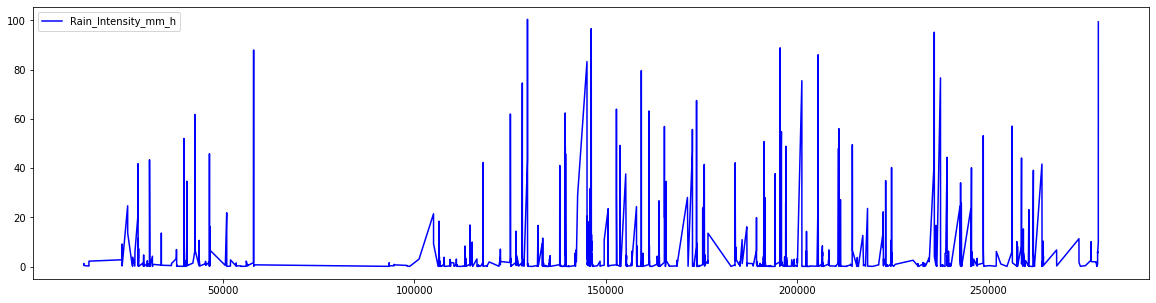

In [127]:
filtered_df = df_MP3000A_RD80_final.query("(Datetime >= '2020-03-1' and Datetime <='2022-07-30') and (Rain_Intensity_mm_h > 0 and DataQuality > 0)")


plt.figure(figsize=(20, 5))
filtered_df['Rain_Intensity_mm_h'].plot(legend=True, color='b')

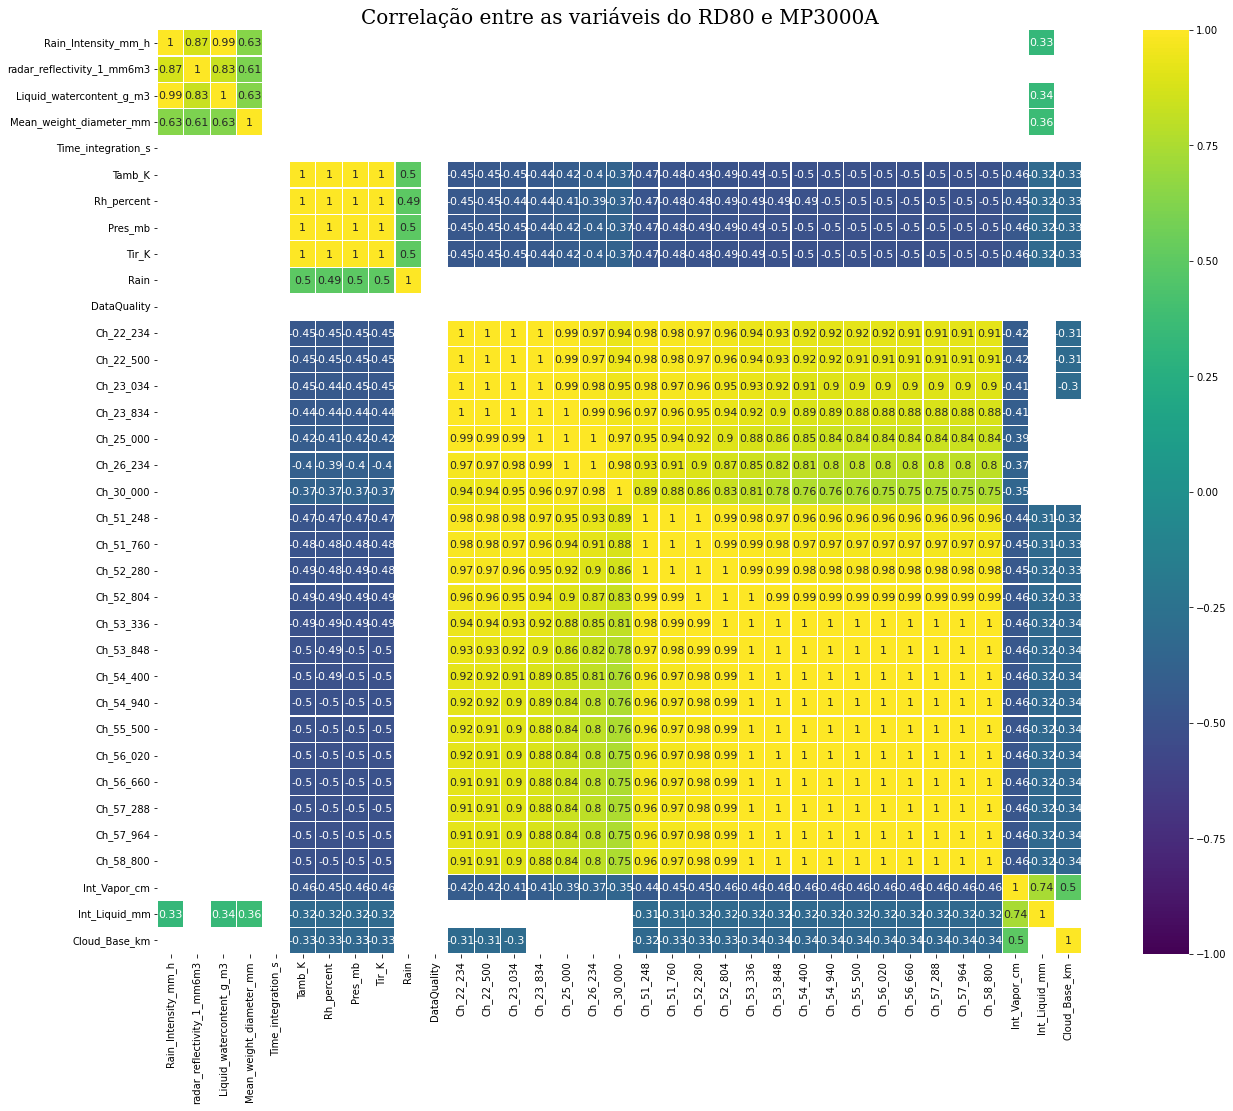

In [136]:
corr = filtered_df.corr()
plt.figure(figsize=(22, 17))
plt.title('Correlação entre as variáveis do RD80 e MP3000A', fontsize=20, fontfamily='serif')
sns.heatmap(corr[(corr >= 0.30) | (corr <= -0.30)],cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1, annot=True, annot_kws={"size": 11}, square=True);